Análise de dados 

rode os seguintes comandos no terminal:


pip install pandas


pip install matplot

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('data-test-analytics_5 (1).csv')

In [4]:
#Extraindo os "anos" contidos no dataFrame para uma melhor análise

# Passo 1: Converter a coluna de datas para o tipo datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%y %I:%M %p')

# Passo 2: Extrair os anos da coluna de datas
df['ano'] = df['created_at'].dt.year

Quantidade de assinaturas realizadas por ano

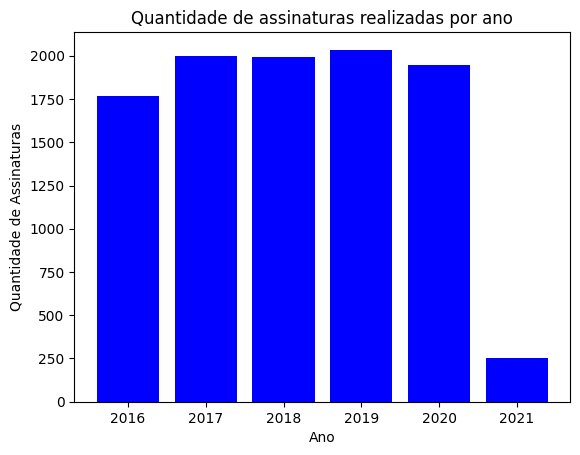

In [5]:
contagem_anos = df['ano'].value_counts().sort_index()

# Criando um gráfico de barras com o Matplotlib
plt.bar(contagem_anos.index, contagem_anos.values, color='blue')

# Personalizar o gráfico
plt.xlabel('Ano')
plt.ylabel('Quantidade de Assinaturas')
plt.title('Quantidade de assinaturas realizadas por ano')
plt.show()

Quantidade de assinaturas ativas por ano

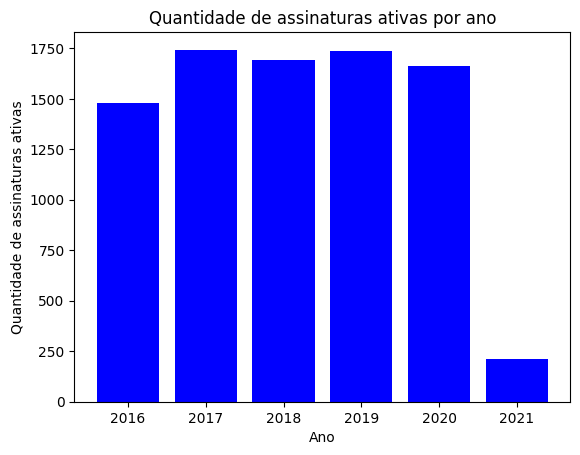

In [6]:
# Filtrando os dados com status igual a "active"
df_active = df[df['status'] == 'active']
# Contando os dados "active" por ano
contagem_active_por_ano = df_active.groupby('ano').size()

plt.bar(contagem_active_por_ano.index, contagem_active_por_ano.values, color='blue')
plt.xlabel('Ano')
plt.ylabel('Quantidade de assinaturas ativas')
plt.title('Quantidade de assinaturas ativas por ano')
plt.show()

Quantidade de assinaturas pausadas por ano

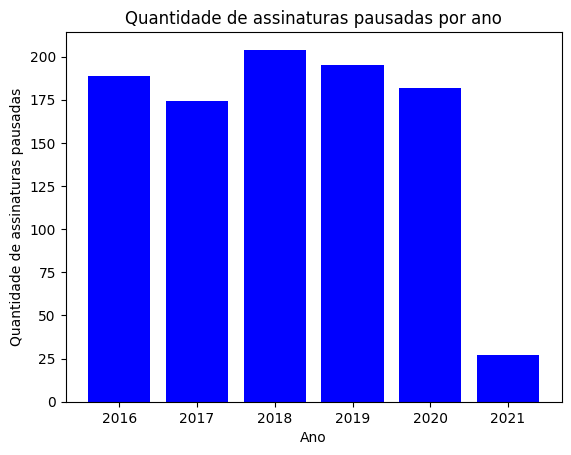

In [8]:
#filtrando a quantidade de assinaturas 'paused'
df_paused = df[df['status'] == 'paused']
# Contando os dados "paused" por ano
contagem_paused_por_ano = df_paused.groupby('ano').size()

plt.bar(contagem_paused_por_ano.index, contagem_paused_por_ano.values, color='blue')
plt.xlabel('Ano')
plt.ylabel('Quantidade de assinaturas pausadas')
plt.title('Quantidade de assinaturas pausadas por ano')
plt.show()

Quantidades de assinaturas canceladas por ano

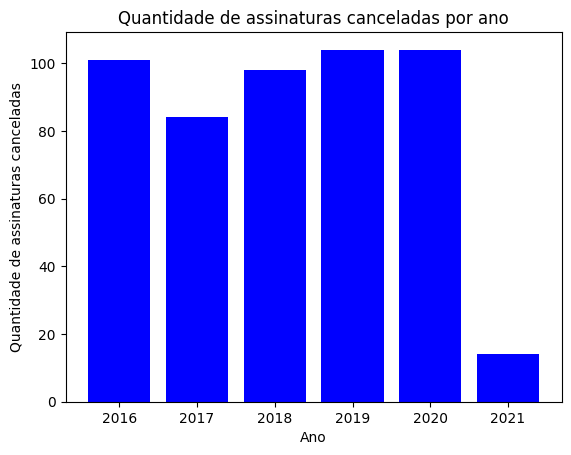

In [9]:
#filtrando dados com status canceled
df_canceled = df[df['status'] == 'canceled']
# Contando os dados "paused" por ano
contagem_canceled_por_ano = df_canceled.groupby('ano').size()

plt.bar(contagem_canceled_por_ano.index, contagem_canceled_por_ano.values, color='blue')
plt.xlabel('Ano')
plt.ylabel('Quantidade de assinaturas canceladas')
plt.title('Quantidade de assinaturas canceladas por ano')
plt.show()

Quantidade de registros por status e ano

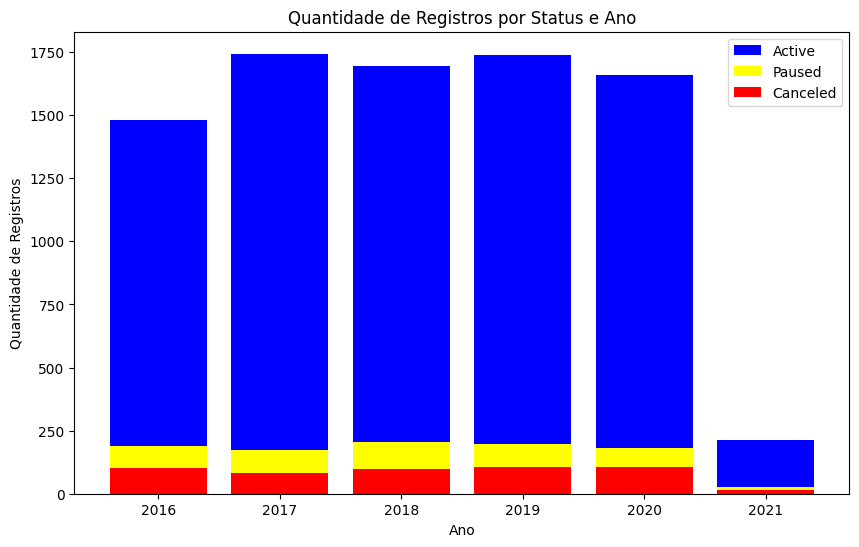

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(contagem_active_por_ano.index, contagem_active_por_ano.values, label='Active',color='blue')
plt.bar(contagem_paused_por_ano.index, contagem_paused_por_ano.values, label='Paused',color='yellow')
plt.bar(contagem_canceled_por_ano.index, contagem_canceled_por_ano.values, label='Canceled',color='red')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Registros')
plt.title('Quantidade de Registros por Status e Ano')
plt.legend()
plt.show()


Average ticket (média de todos os registros)

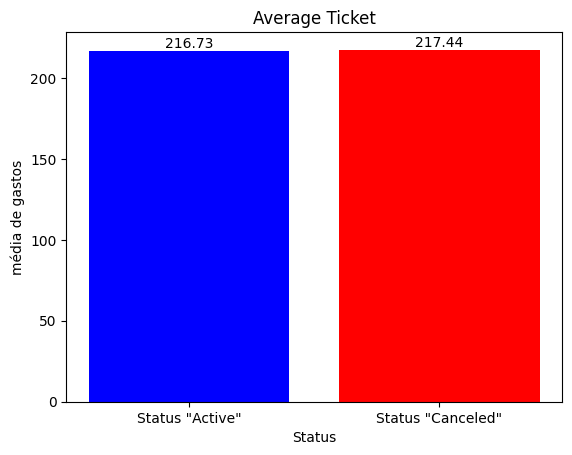

In [11]:
# Calcular a média dos gastos para os registros com status "active"
media_gastos_active = df_active['average_ticket'].mean()
# Calcular a média dos gastos para os registros com status "canceled"
media_gastos_canceled = df_canceled['average_ticket'].mean()

plt.bar(['Status "Active"', 'Status "Canceled"'],
        [media_gastos_active, media_gastos_canceled],
        color=['blue', 'red'])
plt.xlabel('Status')
plt.ylabel('média de gastos')
plt.title('Average Ticket')
plt.text(0, media_gastos_active, f'{media_gastos_active:.2f}', ha='center', va='bottom')
plt.text(1, media_gastos_canceled, f'{media_gastos_canceled:.2f}', ha='center', va='bottom')
plt.show()

Average ticket anual

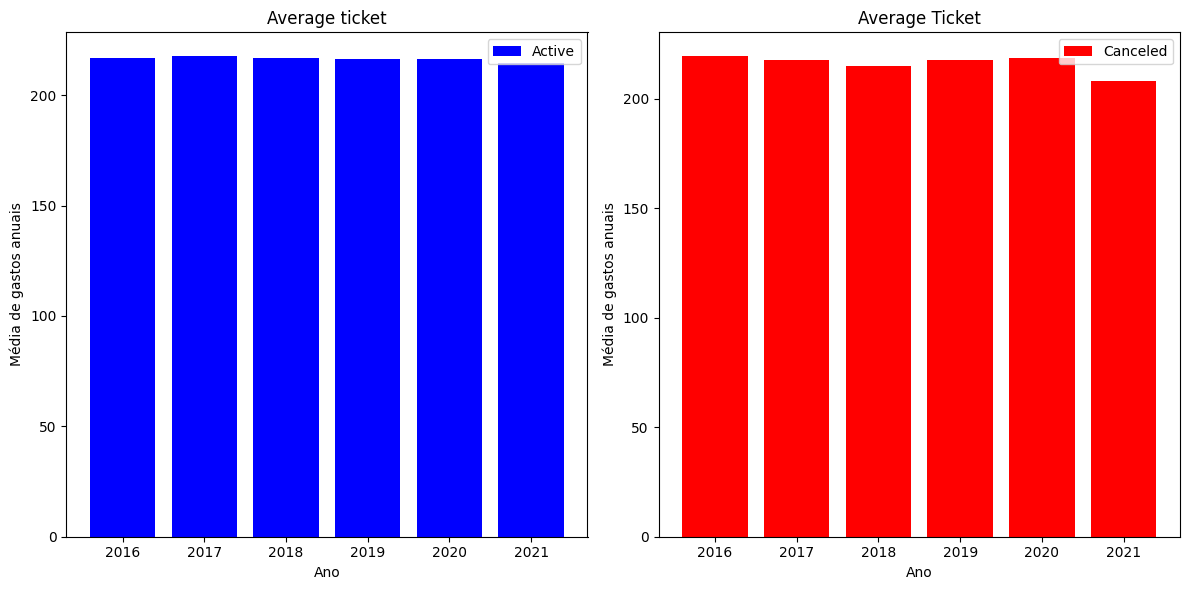

In [12]:
# Calcular a média dos gastos por ano para os registros com status "active"
media_gastos_active_por_ano = df_active.groupby('ano')['average_ticket'].mean()
# Calcular a média dos gastos por ano para os registros com status "canceled"
media_gastos_canceled_por_ano = df_canceled.groupby('ano')['average_ticket'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.bar(media_gastos_active_por_ano.index, media_gastos_active_por_ano, label='Active', color='blue')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Média de gastos anuais')
ax1.set_title('Average ticket')
ax1.legend()
ax2.bar(media_gastos_canceled_por_ano.index, media_gastos_canceled_por_ano, label='Canceled', color='red')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Média de gastos anuais')
ax2.set_title('Average Ticket')
ax2.legend()

plt.tight_layout()
plt.show()

Items quantity (média de todos os registros)

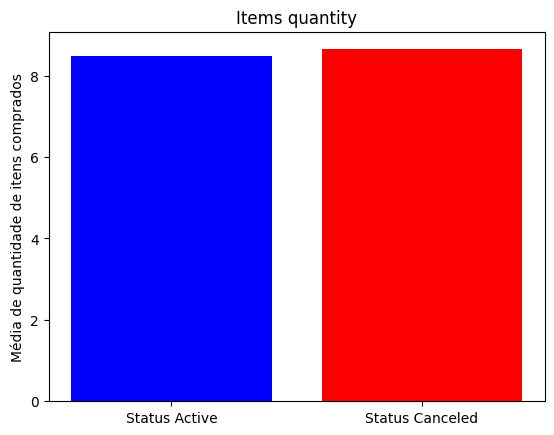

In [14]:
# Calcular a média da coluna "items_quantity" para os registros com status "active"
media_items_quantity_active = df_active['items_quantity'].mean()
# Calcular a média da coluna "items_quantity" para os registros com status "canceled"
media_items_quantity_canceled = df_canceled['items_quantity'].mean()

plt.bar(['Status Active', 'Status Canceled'],
        [media_items_quantity_active, media_items_quantity_canceled],
        color=['blue', 'red'])
plt.ylabel('Média de quantidade de itens comprados')
plt.title('Items quantity')
plt.show()

Items quantity anual

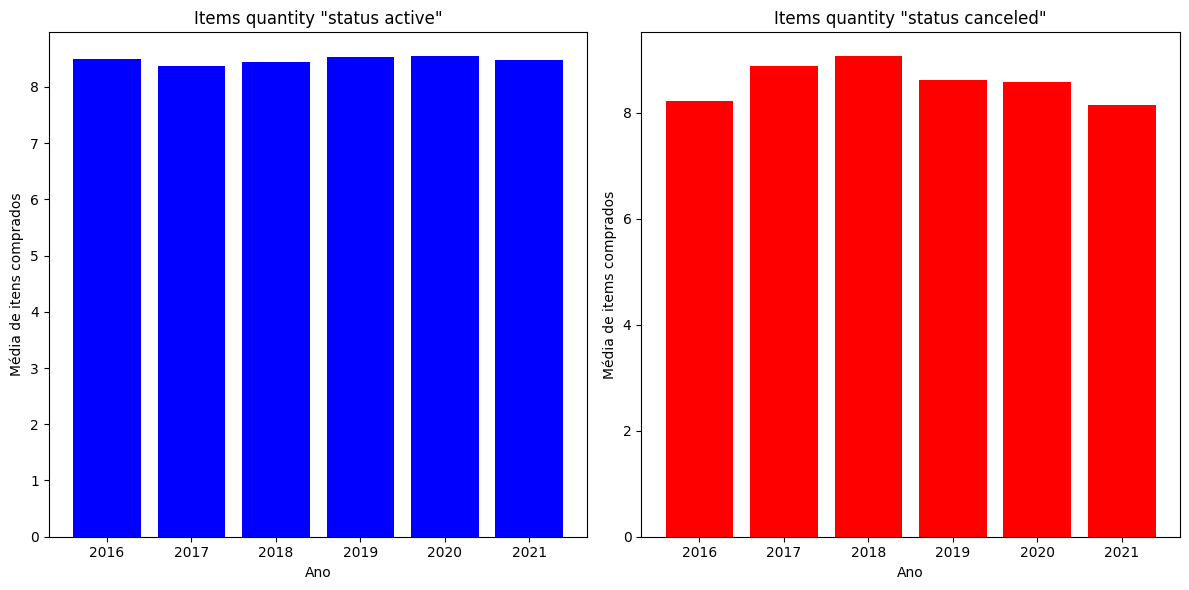

In [15]:
# Calcular a média da coluna "items_quantity" para os registros com status "active" de acordo com cada ano
media_items_quantity_active_por_ano = df_active.groupby(['ano'])['items_quantity'].mean()
# Calcular a média da coluna "items_quantity" para os registros com status "canceled" de acordo com cada ano
media_items_quantity_canceled_por_ano = df_canceled.groupby(['ano'])['items_quantity'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(media_items_quantity_active_por_ano.index, media_items_quantity_active_por_ano, color='blue')
plt.xlabel('Ano')
plt.ylabel('Média de itens comprados')
plt.title('Items quantity "status active"')
plt.subplot(1, 2, 2)
plt.bar(media_items_quantity_canceled_por_ano.index, media_items_quantity_canceled_por_ano, color='red')
plt.xlabel('Ano')
plt.ylabel('Média de items comprados')
plt.title('Items quantity "status canceled"')

plt.tight_layout()
plt.show()

All revenue (média de todos os registros)

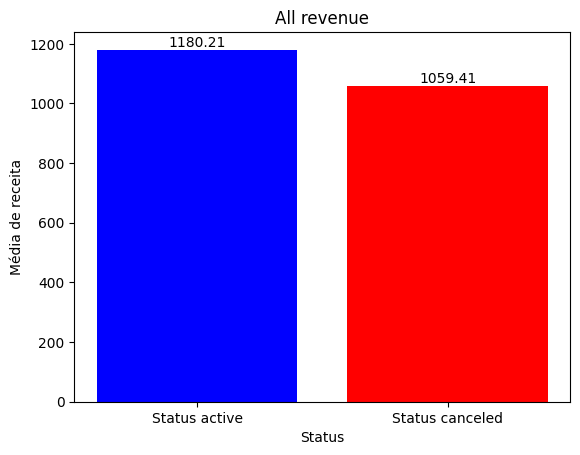

In [16]:
# Calcular a média da coluna "all_revenue" para os registros com status "active"
media_all_revenue_active = df_active['all_revenue'].mean()


# Calcular a média da coluna "all_revenue" para os registros com status "canceled"
media_all_revenue_canceled = df_canceled['all_revenue'].mean()

# Criar um gráfico de barras com cores diferentes para as médias de "all_revenue"
plt.bar(['Status active', 'Status canceled'],
        [media_all_revenue_active, media_all_revenue_canceled],
        color=['blue', 'red'])

plt.xlabel('Status')
plt.ylabel('Média de receita')
plt.title('All revenue')

# Adicionar os valores das médias acima das barras
plt.text(0, media_all_revenue_active, f'{media_all_revenue_active:.2f}', ha='center', va='bottom')
plt.text(1, media_all_revenue_canceled, f'{media_all_revenue_canceled:.2f}', ha='center', va='bottom')

plt.show()

All revenue anual

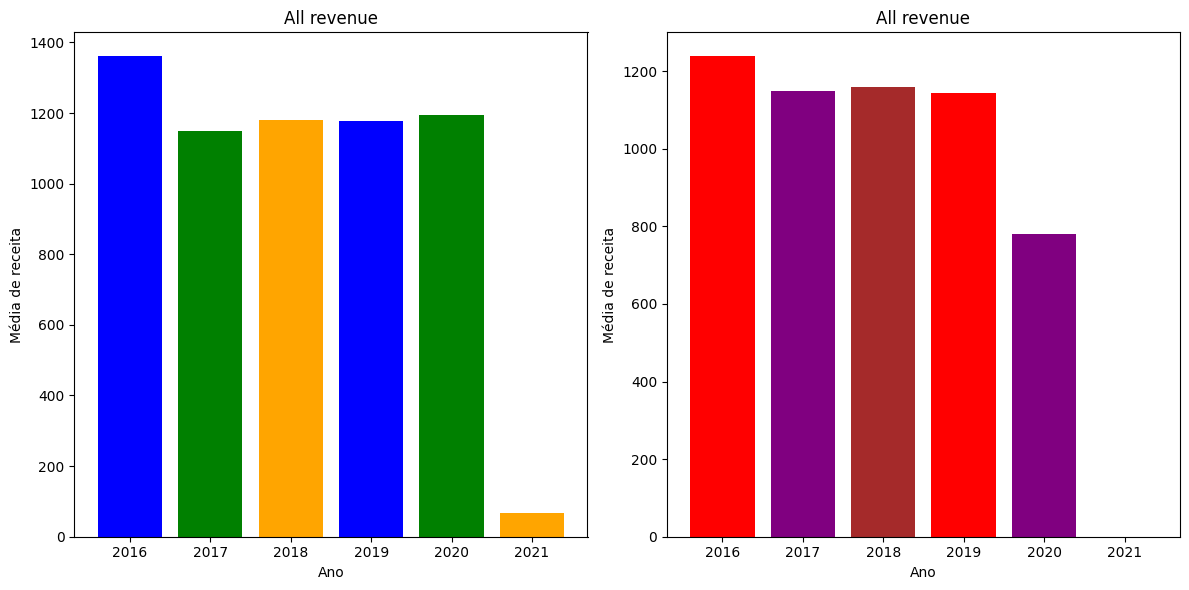

In [17]:
# Calcular a média da coluna "all_revenue" para os registros com status "active" de acordo com cada ano
media_all_revenue_active_por_ano = df_active.groupby(['ano'])['all_revenue'].mean()
# Calcular a média da coluna "all_revenue" para os registros com status "canceled" de acordo com cada ano
media_all_revenue_canceled_por_ano = df_canceled.groupby(['ano'])['all_revenue'].mean()

plt.figure(figsize=(12, 6))
colors_active = ['blue', 'green', 'orange']
colors_canceled = ['red', 'purple', 'brown']
plt.subplot(1, 2, 1)
plt.bar(media_all_revenue_active_por_ano.index, media_all_revenue_active_por_ano, color=colors_active)
plt.xlabel('Ano')
plt.ylabel('Média de receita')
plt.title('All revenue')
plt.subplot(1, 2, 2)
plt.bar(media_all_revenue_canceled_por_ano.index, media_all_revenue_canceled_por_ano, color=colors_canceled)
plt.xlabel('Ano')
plt.ylabel('Média de receita')
plt.title('All revenue')

plt.tight_layout()
plt.show()

Recency Anual

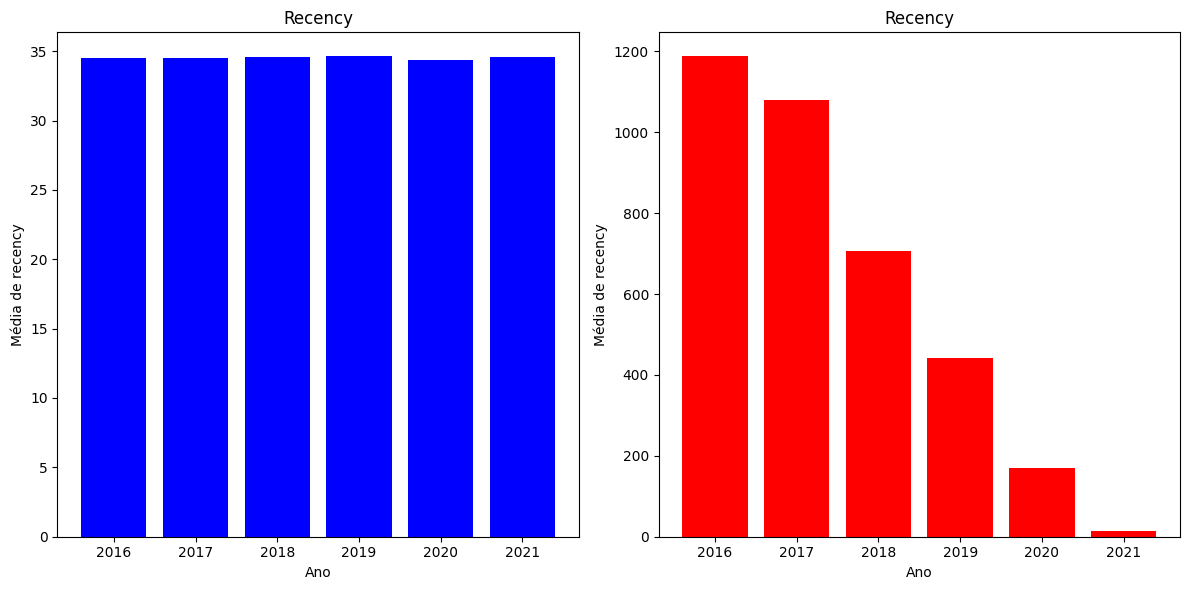

In [18]:
# Calcular a média da coluna "recency" para os registros com status "active" de acordo com cada ano
media_recency_active_por_ano = df_active.groupby(['ano'])['recency'].mean()
# Calcular a média da coluna "recency" para os registros com status "canceled" de acordo com cada ano
media_recency_canceled_por_ano = df_canceled.groupby(['ano'])['recency'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(media_recency_active_por_ano.index, media_recency_active_por_ano, color='blue')
plt.xlabel('Ano')
plt.ylabel('Média de recency')
plt.title('Recency')
plt.subplot(1, 2, 2)
plt.bar(media_recency_canceled_por_ano.index, media_recency_canceled_por_ano, color='red')
plt.xlabel('Ano')
plt.ylabel('Média de recency')
plt.title('Recency')

plt.tight_layout()
plt.show()

Recency (media de todos os registros)

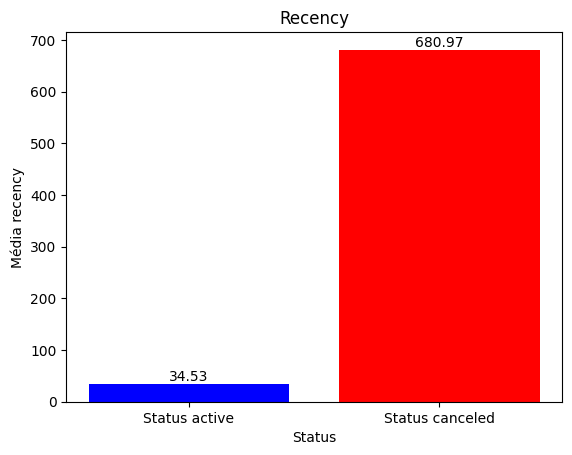

In [19]:
# Calcular a média da coluna "recency" para os registros com status "active"
media_recency_active = df_active['recency'].mean()
# Calcular a média da coluna "recency" para os registros com status "canceled"
media_recency_canceled = df_canceled['recency'].mean()
plt.bar(['Status active', 'Status canceled'],
        [media_recency_active, media_recency_canceled],
        color=['blue', 'red'])

plt.xlabel('Status')
plt.ylabel('Média recency')
plt.title('Recency')
plt.text(0, media_recency_active, f'{media_recency_active:.2f}', ha='center', va='bottom')
plt.text(1, media_recency_canceled, f'{media_recency_canceled:.2f}', ha='center', va='bottom')

plt.show()

Status de assinatura por estado

C:\Users\andde\AppData\Local\Temp\ipykernel_5852\2653842025.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(contagem_active_por_estado.index, rotation=45, ha='right')  # Rotacionar os rótulos do eixo x
C:\Users\andde\AppData\Local\Temp\ipykernel_5852\2653842025.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(contagem_canceled_por_estado.index, rotation=45, ha='right')  # Rotacionar os rótulos do eixo x


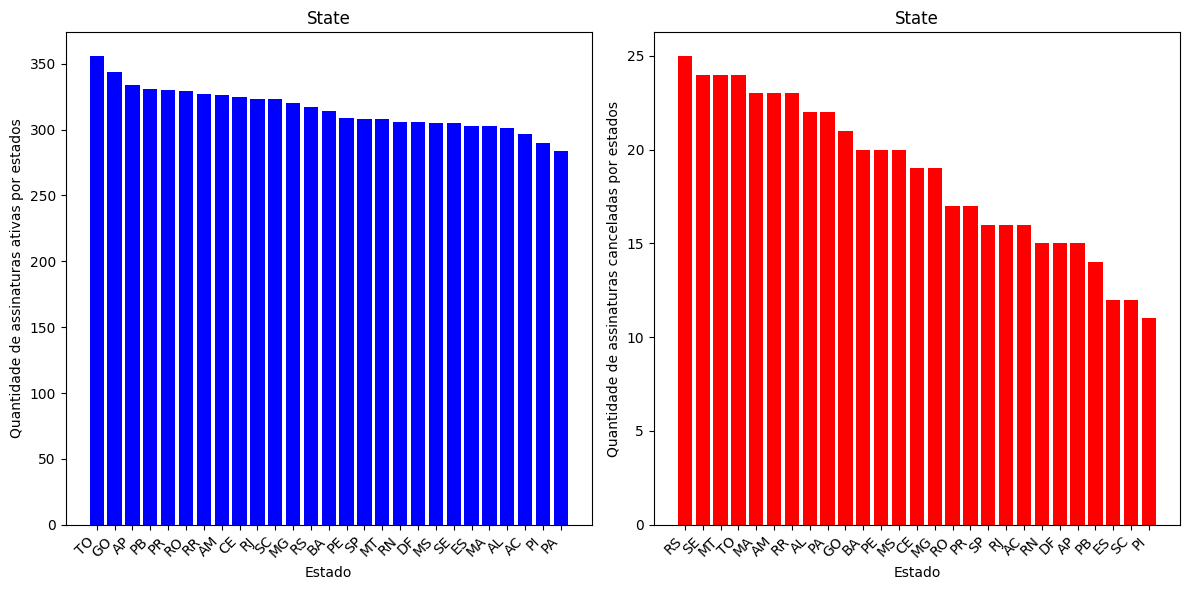

In [20]:
# Agrupar os registros pelo valor da coluna "state" e contar a quantidade de "active" e "canceled" para cada valor de estado
contagem_active_por_estado = df_active['state'].value_counts()
contagem_canceled_por_estado = df_canceled['state'].value_counts()
#Ordenar os estados pela quantidade de "active" e "canceled" em ordem decrescente
contagem_active_por_estado = contagem_active_por_estado.sort_values(ascending=False)
contagem_canceled_por_estado = contagem_canceled_por_estado.sort_values(ascending=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.bar(contagem_active_por_estado.index, contagem_active_por_estado, color='blue')
ax1.set_xlabel('Estado')
ax1.set_ylabel('Quantidade de assinaturas ativas por estados')
ax1.set_title('State')
ax1.set_xticklabels(contagem_active_por_estado.index, rotation=45, ha='right')  # Rotacionar os rótulos do eixo x

ax2.bar(contagem_canceled_por_estado.index, contagem_canceled_por_estado, color='red')
ax2.set_xlabel('Estado')
ax2.set_ylabel('Quantidade de assinaturas canceladas por estados')
ax2.set_title('State')
ax2.set_xticklabels(contagem_canceled_por_estado.index, rotation=45, ha='right')  # Rotacionar os rótulos do eixo x

plt.tight_layout()  # Para evitar sobreposição dos subplots
plt.show()

Canais de marketing

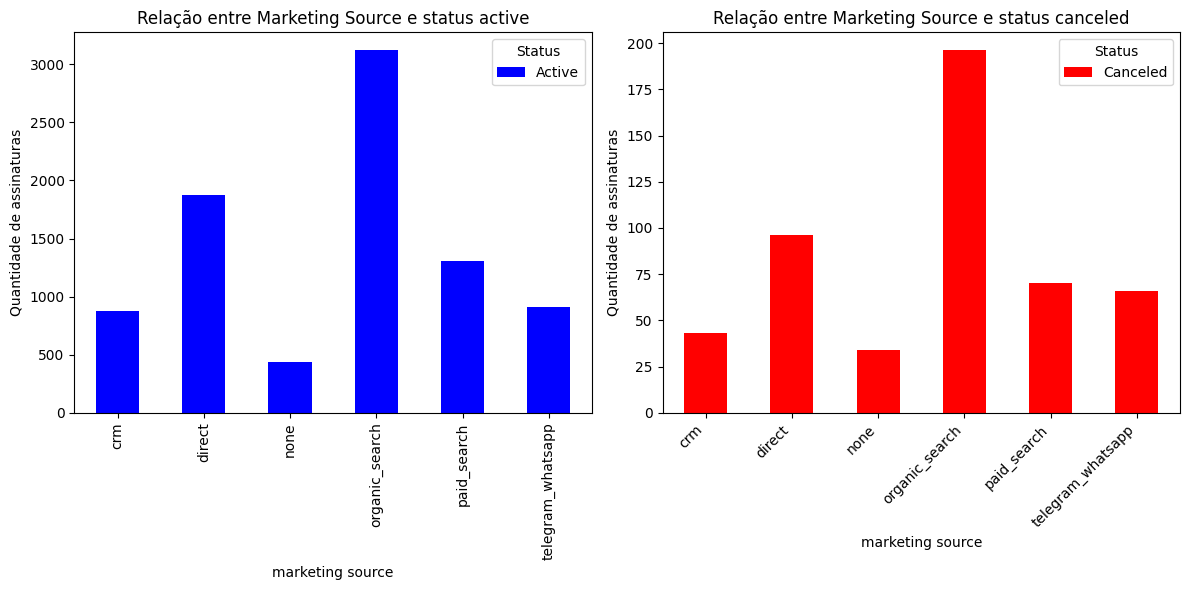

In [21]:

# Criar duas tabelas dinâmicas, uma para cada status, para contar a quantidade de registros para cada fonte de marketing
table_active = df_active.pivot_table(index='marketing_source', columns='status', aggfunc='size', fill_value=0)
table_canceled = df_canceled.pivot_table(index='marketing_source', columns='status', aggfunc='size', fill_value=0)

# Criar dois gráficos de barras empilhadas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

table_active.plot(kind='bar', stacked=True, color='blue', ax=ax1)
ax1.set_xlabel('marketing source')
ax1.set_ylabel('Quantidade de assinaturas')
ax1.set_title('Relação entre Marketing Source e status active')
ax1.legend(title='Status', labels=['Active'])

table_canceled.plot(kind='bar', stacked=True, color='red', ax=ax2)
ax2.set_xlabel('marketing source')
ax2.set_ylabel('Quantidade de assinaturas')
ax2.set_title('Relação entre Marketing Source e status canceled')
ax2.legend(title='Status', labels=['Canceled'])

plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização

plt.tight_layout()  # Para evitar sobreposição dos subplots
plt.show()

Conclusões da análise:

Após realizarmos uma análise de dados com a base fornecida, podemos levantar algumas hipóteses relevantes:

1. A média de quantidade de itens comprados e receita total por assinantes, tanto os que possuem status ativos quanto os cancelados, não apresenta diferença significativa. Isso nos leva a crer que o poder aquisitivo dos usuários não teve um impacto relevante na decisão de cancelar a assinatura.

2. No entanto, notamos que o tempo médio para realizar uma nova compra após a última feita é consideravelmente maior entre os usuários que cancelaram a assinatura, quando comparado aos usuários com assinatura ativa.

Baseando-se nessa análise, surge a hipótese de que algo pode ter ocorrido durante a última compra que levou os usuários a esperarem mais tempo para realizar uma nova compra. Esse maior intervalo entre as compras pode estar relacionado ao cancelamento da assinatura.

Alguns possíveis motivos para os usuários levarem mais tempo para realizar a próxima compra e, consequentemente, cancelarem a assinatura podem incluir:

- Distanciamento da empresa ou marca.
- Experiência negativa com o último produto recebido.
- Mudanças nas necessidades dos clientes.
- Problemas com o atendimento ao cliente.
- Questões relacionadas à logística de entrega.

Sugiro, que seja realizado um contato direto com os clientes que cancelaram a assinatura para conduzir uma pesquisa e identificar as possíveis causas dessa demora em realizar uma nova compra no site, bem como as razões que levaram ao cancelamento da assinatura. Ao compreender as causas subjacentes, será possível tomar medidas para reduzir a probabilidade de novos clientes cancelarem suas assinaturas, melhorando, assim, a retenção de clientes e a satisfação geral.